In [1]:
import pandas as pd
data = pd.read_excel("Heart_Categ.xlsx")
data[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,1,0,1,2,0,1,7,0,1,2,2,3,0
1,2,1,0,2,1,1,0,6,1,3,0,0,3,0
2,3,1,0,2,1,0,1,4,1,2,0,0,3,0
3,2,1,0,2,1,0,1,6,0,0,2,1,3,0
4,2,0,0,1,4,1,1,2,0,1,1,3,2,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
import matplotlib.pyplot as plt  
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn import metrics
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

In [3]:
import tensorflow as tf 
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense 

C:\Users\shank\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shank\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shank\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shank\anaconda3\envs\deeplearning\lib\site-

In [9]:
X=data[['oldpeak','ca','cp','exang','thalach']]
Y=data['target']

In [6]:
X = data.iloc[:,0:13]  
Y = data.iloc[:,-1] 

In [7]:
start=time.time()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=46)

clf=RandomForestClassifier(n_estimators=47)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

end=time.time()
print('Time = ',end-start)
print('R2 = ',r2_score(y_test, y_pred))

Accuracy: 0.9902597402597403
Time =  0.15996384620666504
R2 =  0.960905436852126


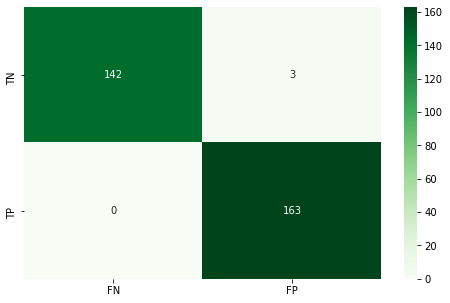

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       145
           1       0.98      1.00      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [8]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
  
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 
  

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=100)
start=time.time()
ml = svm.SVC(kernel='linear')
ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)
print(ml.score(x_test,y_test))
print('Time = ',time.time()-start)
print('R2 = ',r2_score(y_test, y_pred))

0.8474025974025974
Time =  0.09598922729492188
R2 =  0.3845238095238095


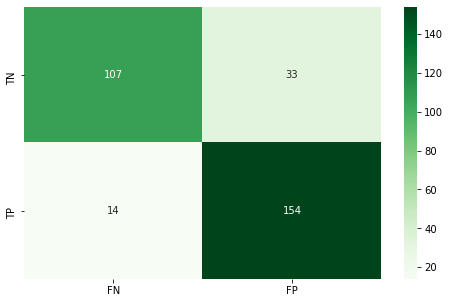

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       140
           1       0.82      0.92      0.87       168

    accuracy                           0.85       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.85      0.85      0.85       308



In [11]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
  
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

In [12]:
s=time.time()
lr = LogisticRegression() 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=100)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test) 

print('Accuracy : ',metrics.accuracy_score(y_test, y_pred)) 
print('Time : ',time.time()-s)
print('R2 = ',r2_score(y_test, y_pred))

Accuracy :  0.8636363636363636
Time :  0.7839491367340088
R2 =  0.44999999999999996


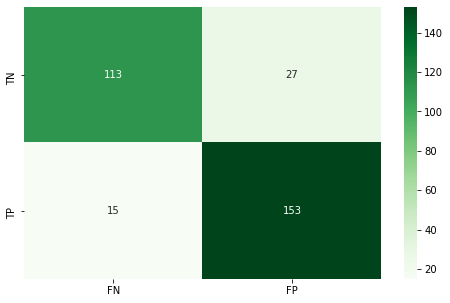

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       140
           1       0.85      0.91      0.88       168

    accuracy                           0.86       308
   macro avg       0.87      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [13]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

In [9]:
s=time.time()
knn = KNeighborsClassifier(n_neighbors = 19) 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=100)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Accuracy : ",knn.score(x_test, y_test))
print('Time : ',time.time()-s)
print('R2 = ',r2_score(y_test, y_pred))

Accuracy :  0.8246753246753247
Time :  0.26398205757141113
R2 =  0.6857142857142857


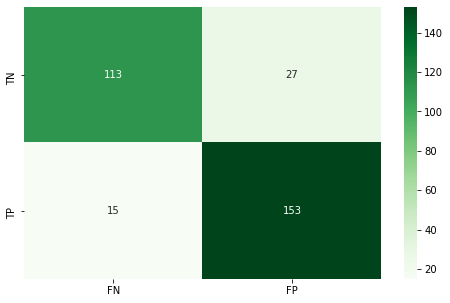

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       140
           1       0.85      0.91      0.88       168

    accuracy                           0.86       308
   macro avg       0.87      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [18]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

In [11]:
s=time.time()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
y_pred = gnb.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print('Time : ',time.time()-s)
print('R2 = ',r2_score(y_test, y_pred))

Accuracy :  0.8344155844155844
Time :  0.02400040626525879
R2 =  0.3321428571428571


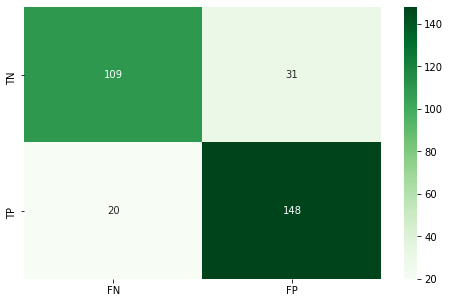

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       140
           1       0.83      0.88      0.85       168

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308



In [20]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=100)
s=time.time()
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=50
)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))
print('Test : ',time.time()-s)
print('R2 = ',r2_score(y_test, y_pred))

Accuracy :  0.922077922077922
Test :  0.17598485946655273
R2 =  0.6857142857142857


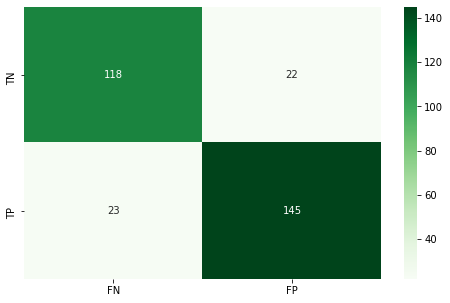

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       140
           1       0.87      0.86      0.87       168

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [16]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=100)
s=time.time()
dtree_model = DecisionTreeClassifier(max_depth = 100).fit(x_train, y_train) 
y_pred = dtree_model.predict(x_test) 
print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))
print('Test : ',time.time()-s)
print('R2 = ',r2_score(y_test, y_pred))

Accuracy :  0.9155844155844156
Test :  0.011997461318969727
R2 =  0.6595238095238095


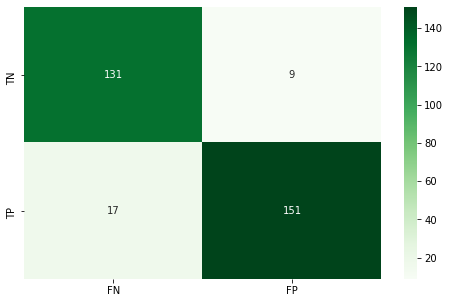

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       140
           1       0.94      0.90      0.92       168

    accuracy                           0.92       308
   macro avg       0.91      0.92      0.92       308
weighted avg       0.92      0.92      0.92       308



In [18]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=100)
estimators = []
s=time.time()

m1 = svm.SVC(kernel='linear')
estimators.append(('svm', m1))

m2 = GaussianNB()
estimators.append(('NB', m2))

m3 =  KNeighborsClassifier(n_neighbors = 2) 
estimators.append(('knn1', m3))
m4 =  KNeighborsClassifier(n_neighbors = 7) 
estimators.append(('knn2', m4))
m5 = KNeighborsClassifier(n_neighbors = 8) 
estimators.append(('knn3', m5))
m6 = KNeighborsClassifier(n_neighbors = 10) 
estimators.append(('knn4', m6))
m7 =  KNeighborsClassifier(n_neighbors = 5) 
estimators.append(('knn5', m7))

ensemble = VotingClassifier(estimators)
ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)
print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))
print('Time : ',time.time()-s)
print('R2 = ',r2_score(y_test, y_pred))

Accuracy :  0.8538961038961039
Time :  0.20000958442687988
R2 =  0.4107142857142857


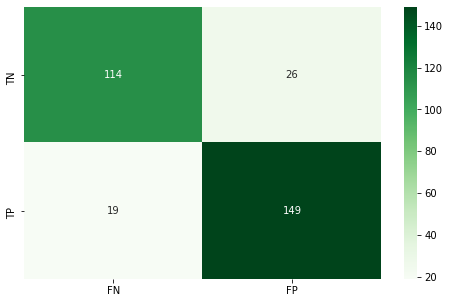

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       140
           1       0.85      0.89      0.87       168

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [17]:
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 

In [18]:
x_train,x_test,y_train, y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 10 ) 
s=time.time()
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 5,  
                     units = 8, kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "relu", units = 14,  
                     kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "sigmoid", units = 1,  
                     kernel_initializer = "uniform")) 
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',  
                   metrics = ['accuracy'] )
classifier.fit(x_train , y_train , batch_size = 8  ,epochs = 5 )
y_pred = classifier.predict(x_test) 
y_pred = (y_pred > 0.5)
end=time.time()
print('Time = ',end-s)
print('R2 = ',r2_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
717/717 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5174
Epoch 2/5
717/717 [==============================] - 0s 245us/step - loss: 0.6353 - accuracy: 0.6597
Epoch 3/5
717/717 [==============================] - 0s 245us/step - loss: 0.5462 - accuracy: 0.7852
Epoch 4/5
717/717 [==============================] - 0s 234us/step - loss: 0.4833 - accuracy: 0.8215
Epoch 5/5
717/717 [==============================] - 0s 212us/step - loss: 0.4481 - accuracy: 0.8312
Time =  4.43172550201416
R2 =  0.23373392367699775
Accuracy: 0.8084415584415584


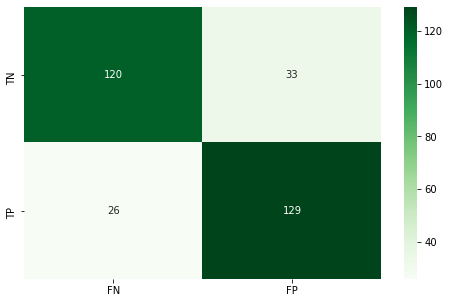

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       153
           1       0.80      0.83      0.81       155

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308



In [20]:
from sklearn.metrics import confusion_matrix, classification_report 
import matplotlib.pyplot as plt  
import seaborn as sn
cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['FN', 'FP'],  
                           index =['TN', 'TP']) 
plt.figure(figsize = (8, 5)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print('The details for confusion matrix is =') 
print (classification_report(y_test, y_pred)) 